In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import Audio

# Set random seed for reproducibility
np.random.seed(42)


In [4]:

DATA_PATH = '../data/raw/'  

def get_audio_files(data_path):
    """Get list of audio files and their corresponding emotions."""
    audio_files = []
    emotions = []
    

    emotion_map = {
        '01': 'neutral',
        '02': 'calm',
        '03': 'happy',
        '04': 'sad',
        '05': 'angry',
        '06': 'fearful',
        '07': 'disgust',
        '08': 'surprised'
    }
    

    for filename in os.listdir(data_path):
        if filename.endswith('.wav'):
            parts = filename.split('-')
            emotion_code = parts[2]
            
            audio_files.append(os.path.join(data_path, filename))
            emotions.append(emotion_map[emotion_code])
    
    return audio_files, emotions


audio_files, emotions = get_audio_files(DATA_PATH)
print(f"Loaded {len(audio_files)} audio files.")


Loaded 60 audio files.


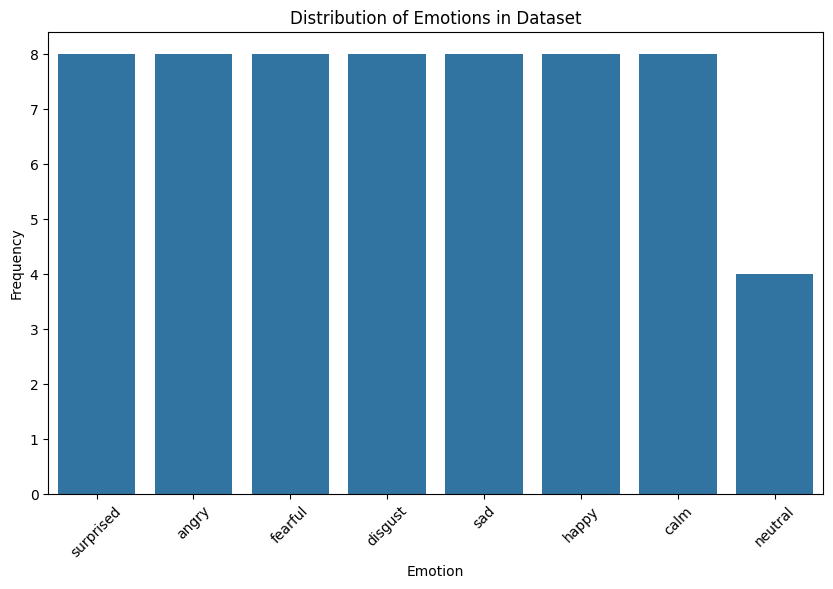

In [5]:
# Plot emotion distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=emotions)
plt.title('Distribution of Emotions in Dataset')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [6]:
def analyze_audio(file_path):
    """Analyze a single audio file and display its characteristics."""
    y, sr = librosa.load(file_path)

    fig, axes = plt.subplots(3, 1, figsize=(15, 10))
    
    librosa.display.waveshow(y, sr=sr, ax=axes[0])
    axes[0].set_title('Waveform')
    
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_db = librosa.power_to_db(mel_spect, ref=np.max)
    img = librosa.display.specshow(mel_db, sr=sr, ax=axes[1])
    axes[1].set_title('Mel Spectrogram')
    fig.colorbar(img, ax=axes[1], format='%+2.0f dB')
    
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    librosa.display.specshow(mfccs, sr=sr, ax=axes[2])
    axes[2].set_title('MFCC')
    
    plt.tight_layout()
    plt.show()
    
    return Audio(y, rate=sr)



Analyzing neutral audio:


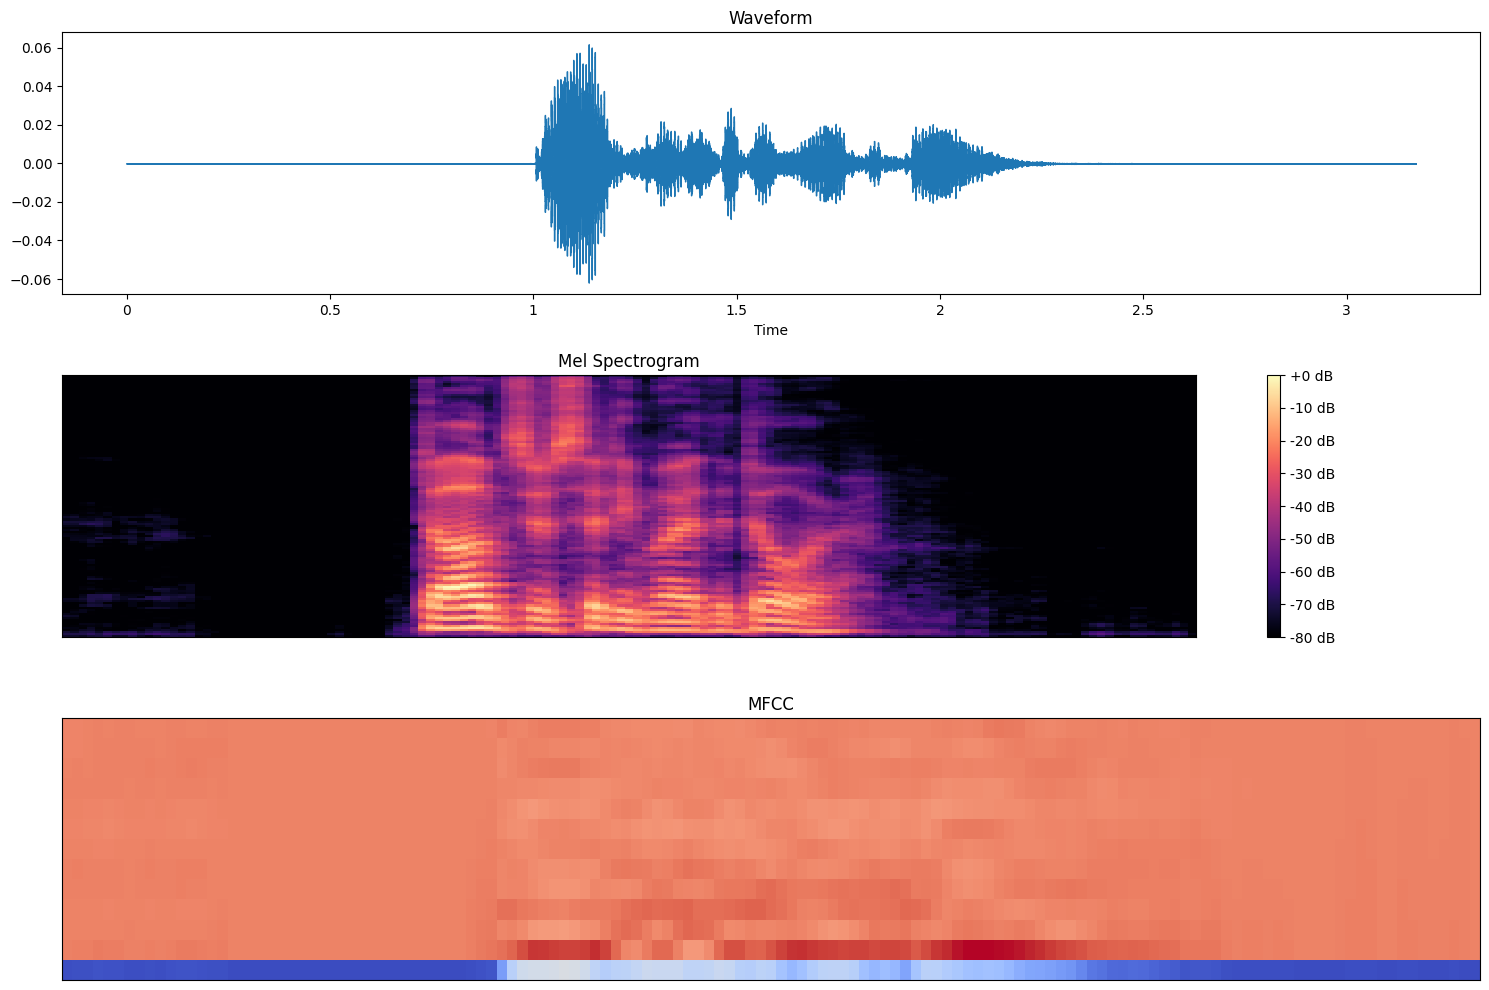


Analyzing sad audio:


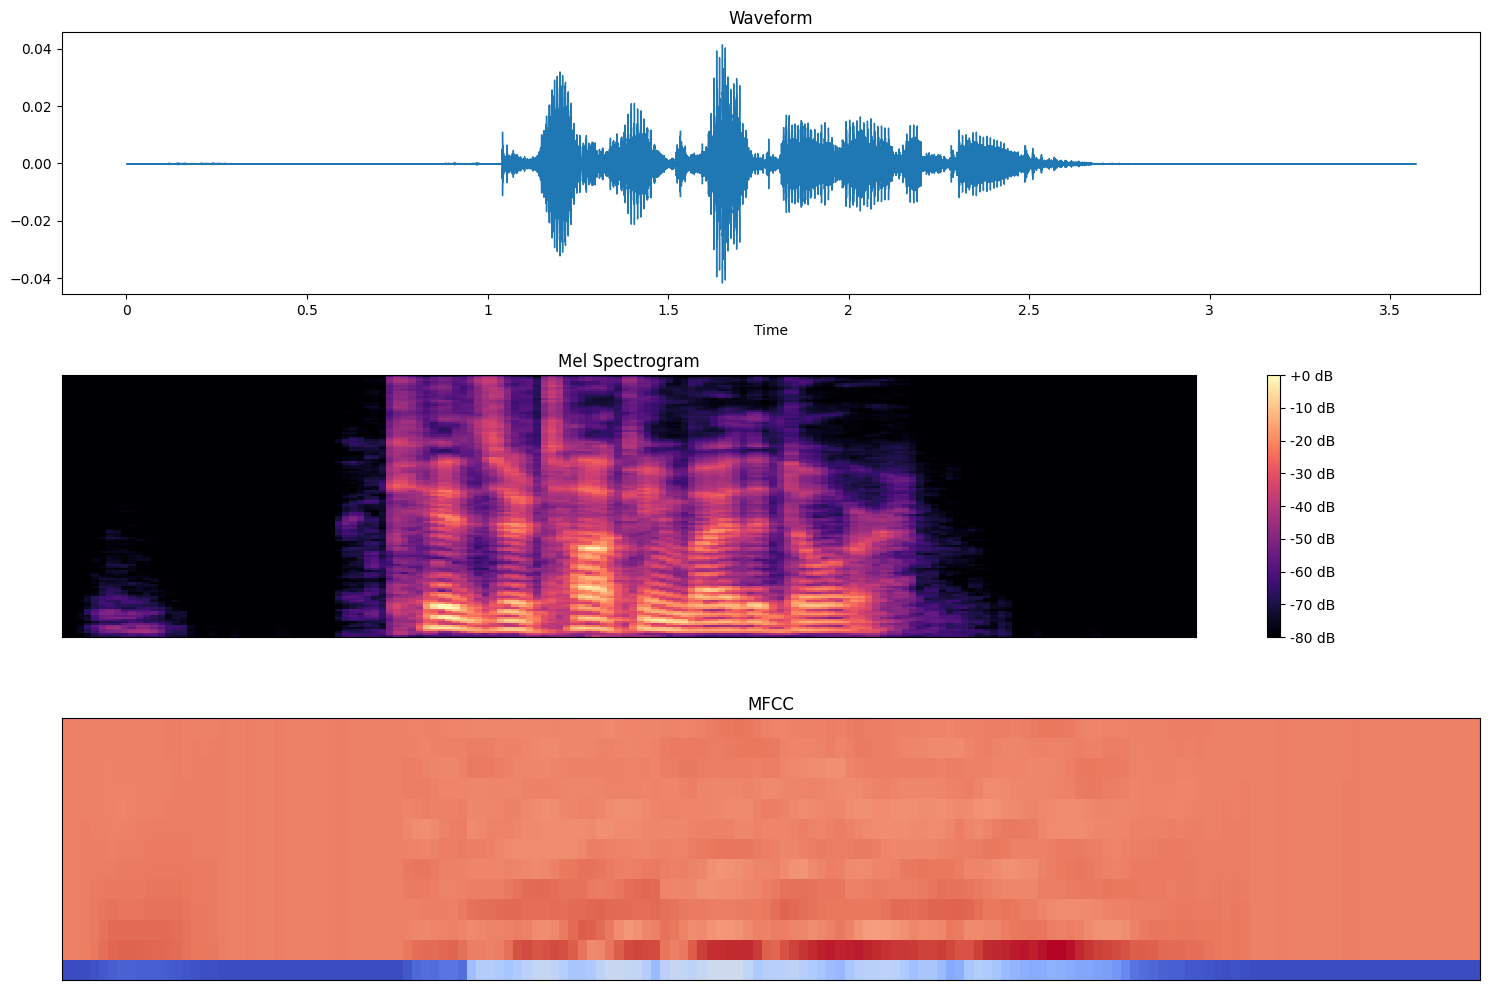


Analyzing disgust audio:


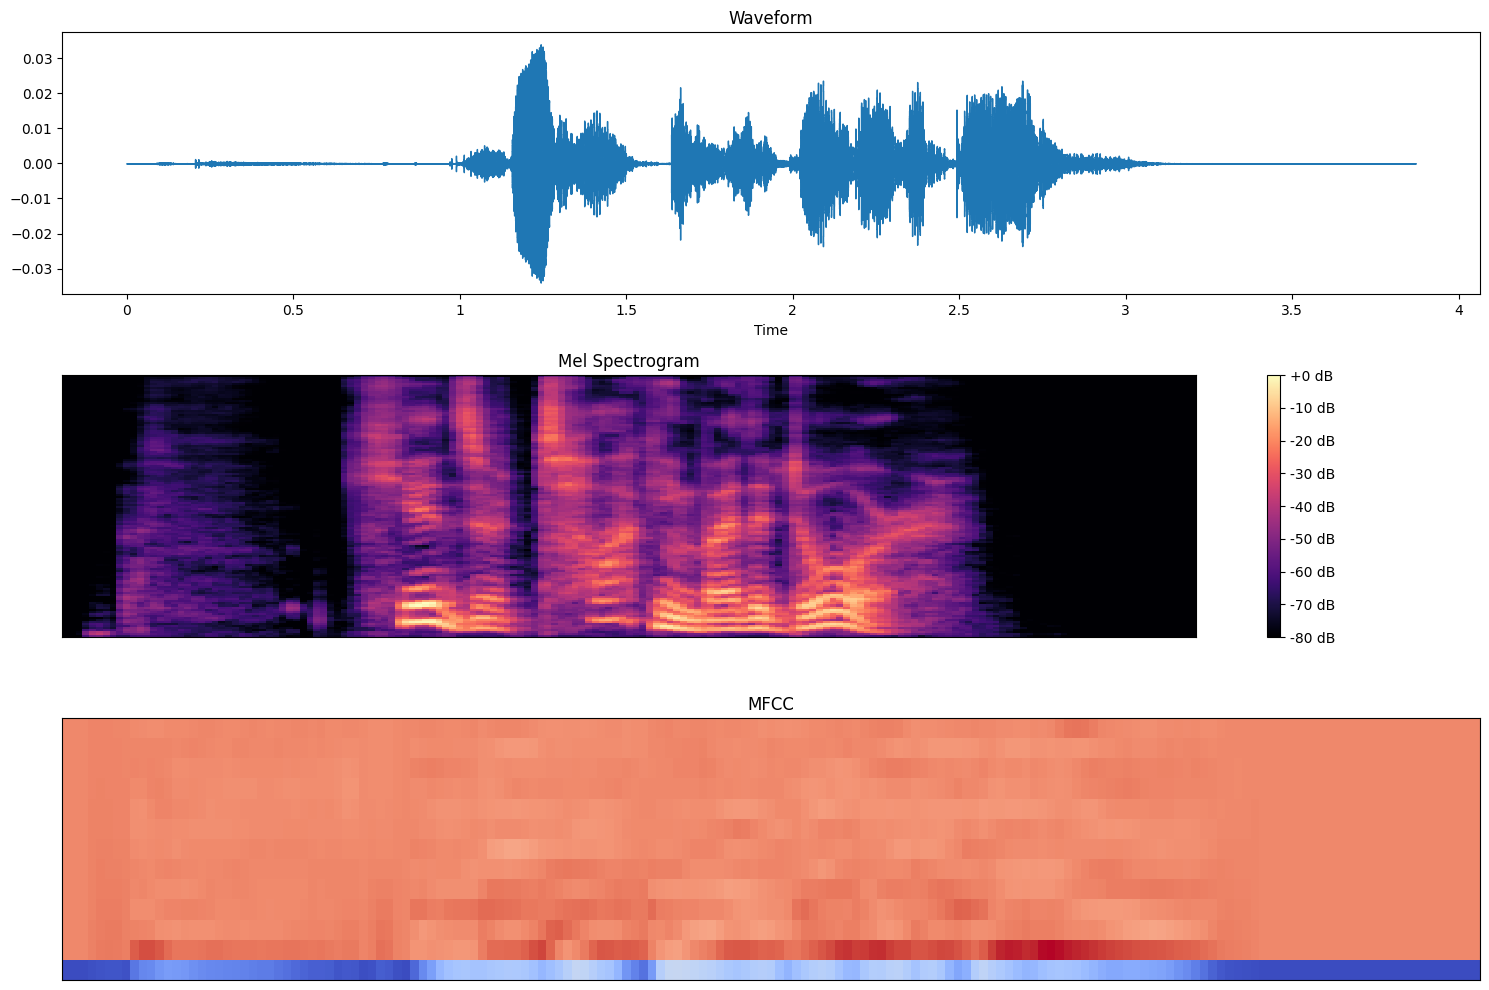


Analyzing angry audio:


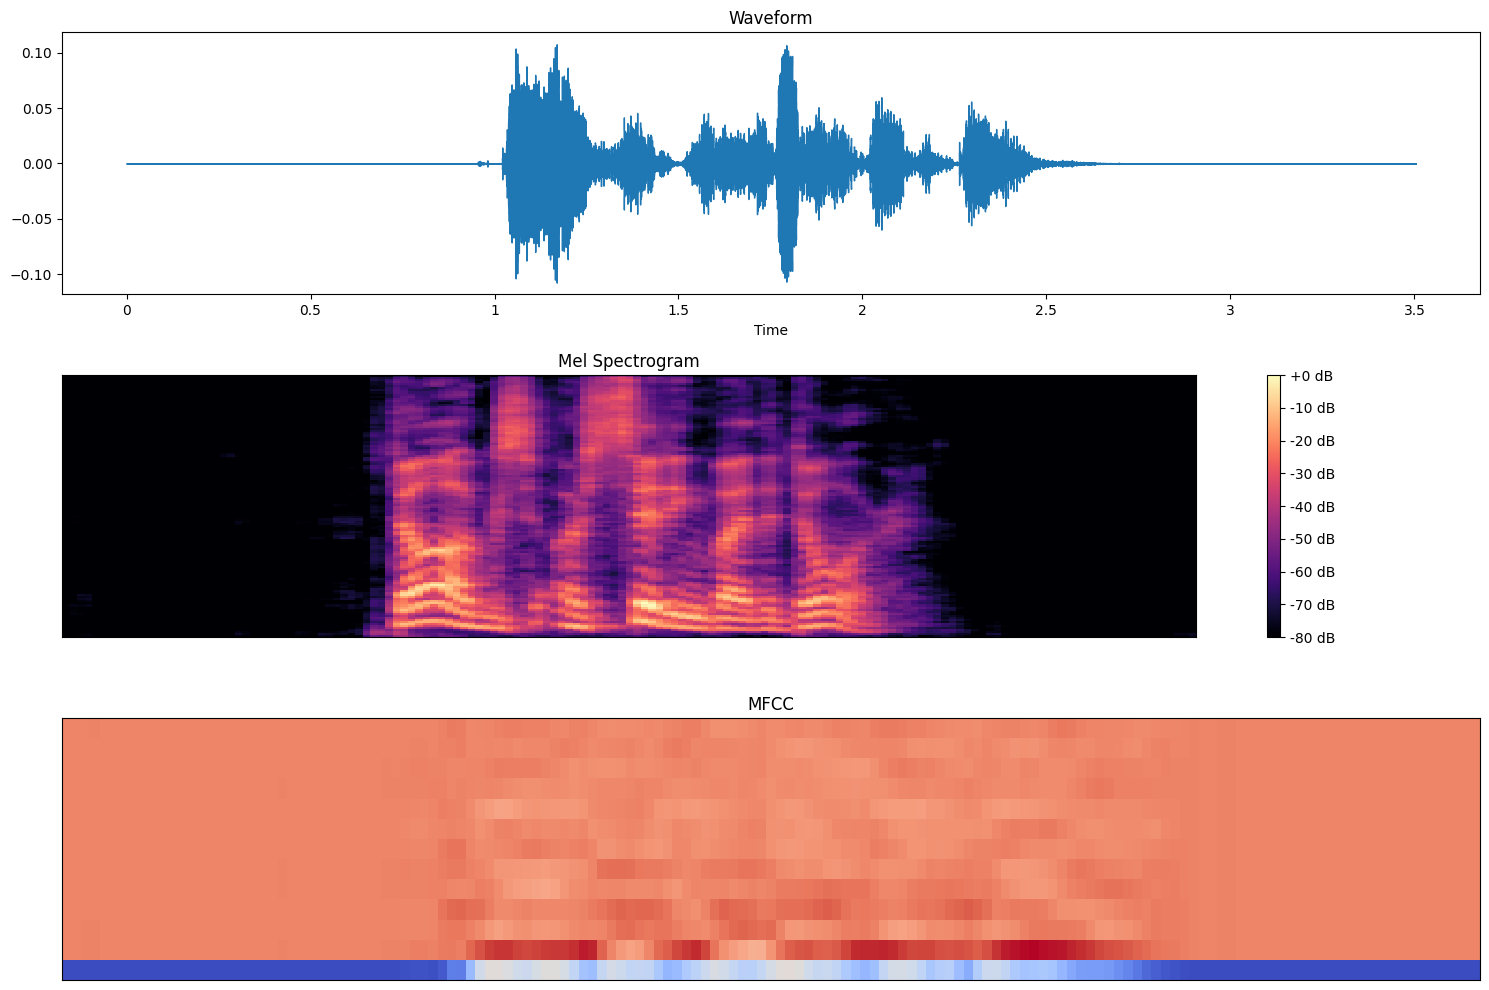


Analyzing calm audio:


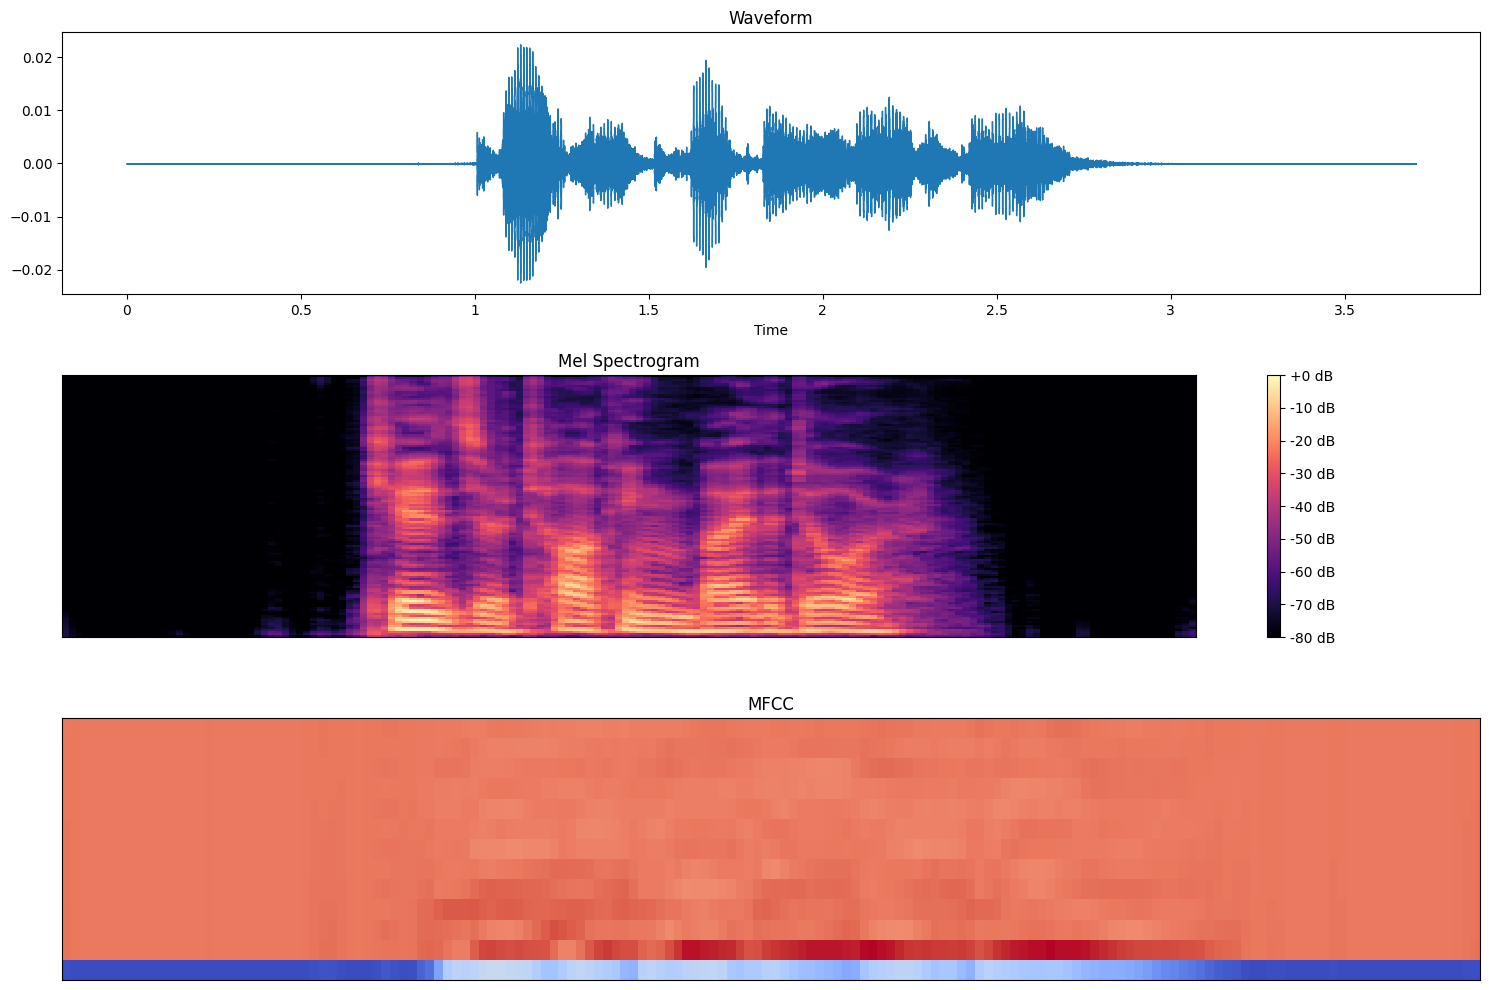


Analyzing fearful audio:


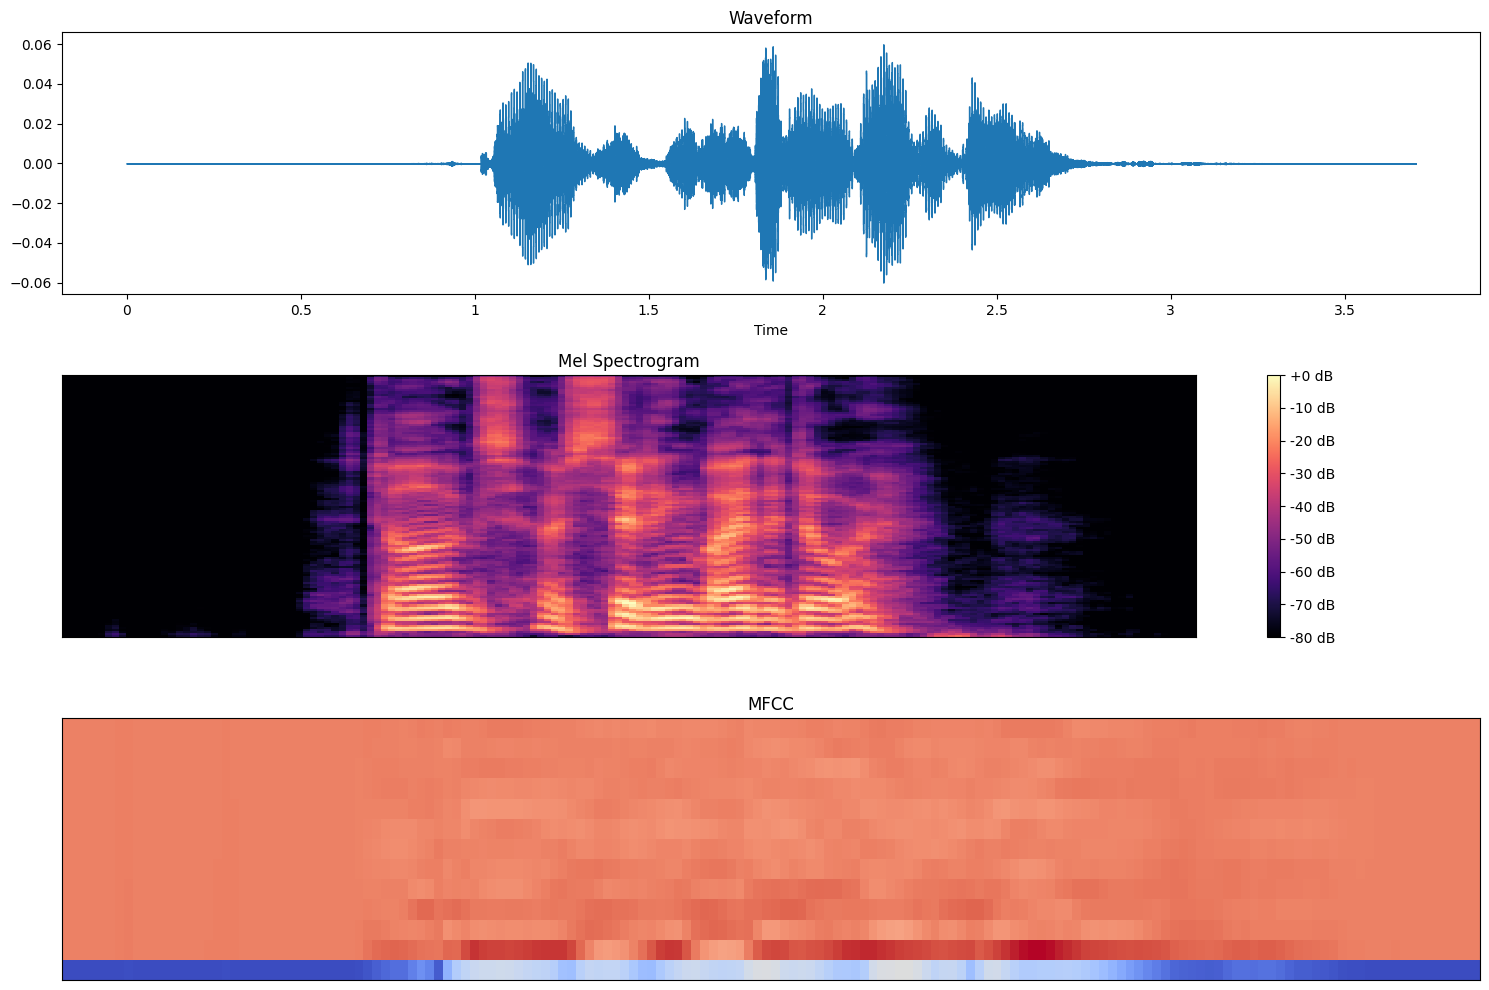


Analyzing surprised audio:


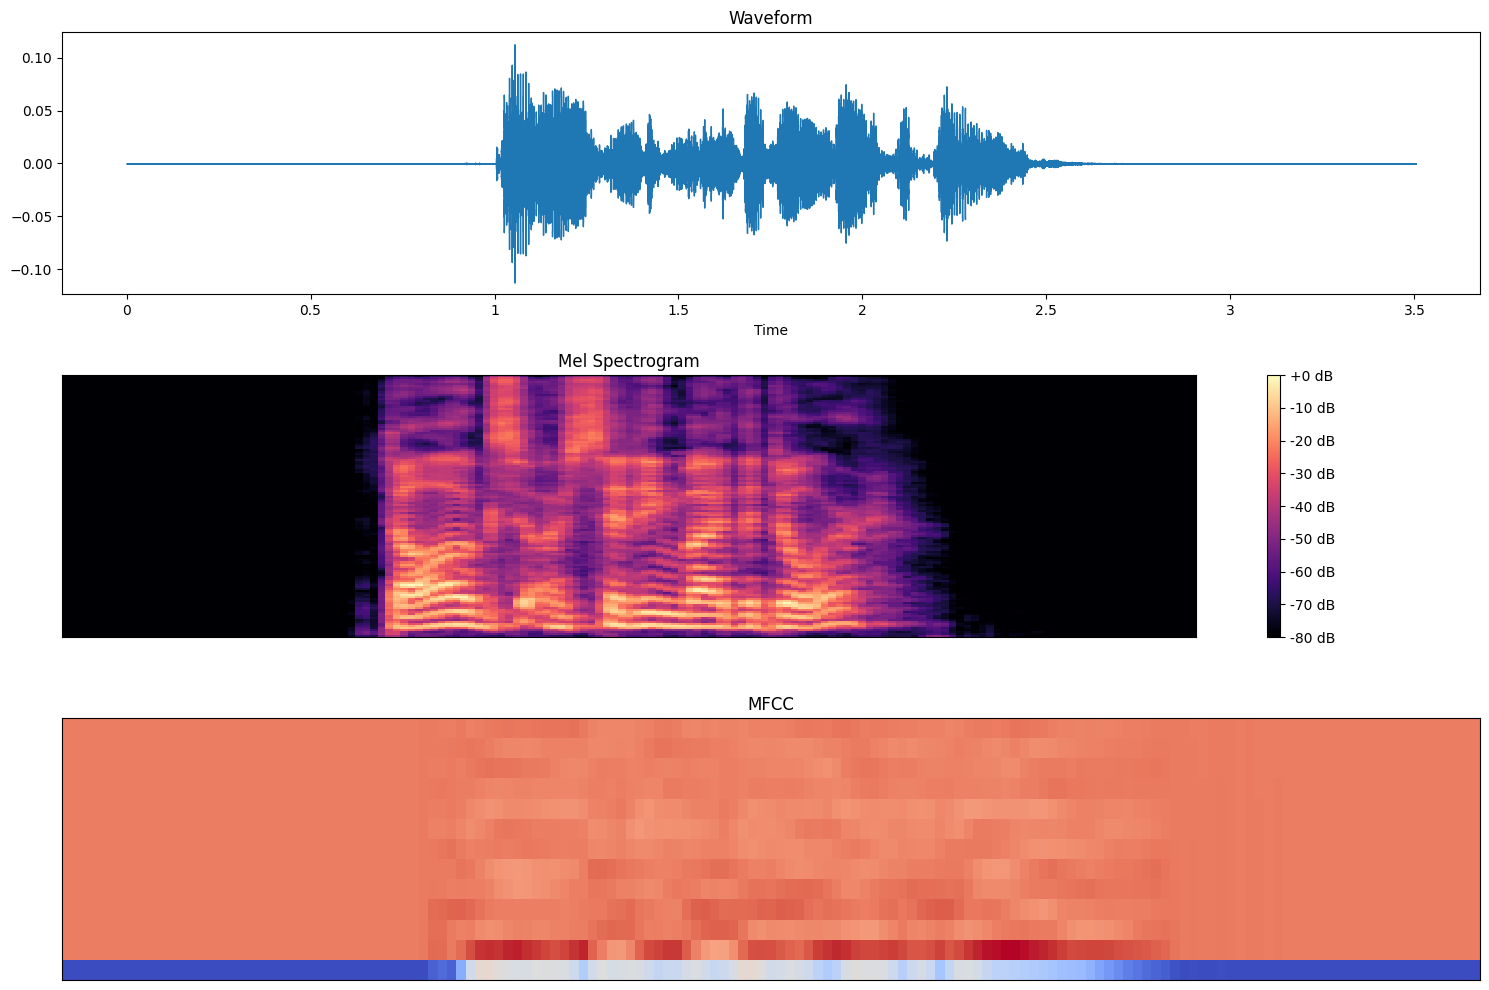


Analyzing happy audio:


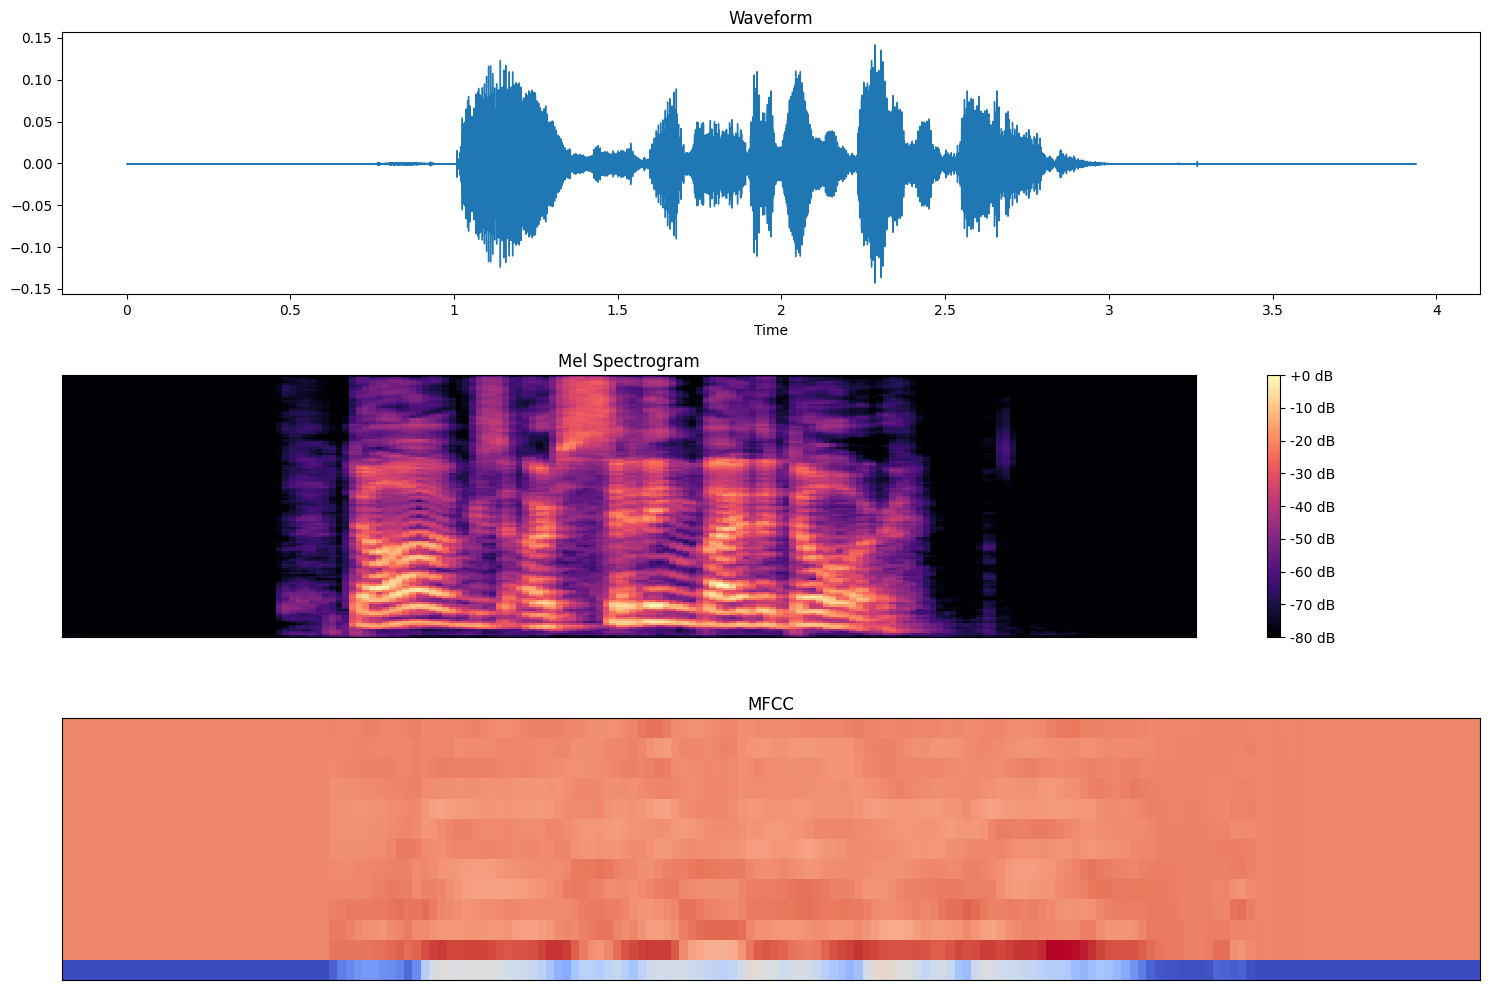

In [7]:

unique_emotions = list(set(emotions))
for emotion in unique_emotions:

    idx = emotions.index(emotion)
    print(f"\nAnalyzing {emotion} audio:")
    audio_player = analyze_audio(audio_files[idx])
    display(audio_player)


In [8]:
def extract_features(file_path):
    """Extract audio features from a file."""
    y, sr = librosa.load(file_path)
    

    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    spectral_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    
    features = {
        'mfcc_mean': np.mean(mfccs, axis=1),
        'mfcc_std': np.std(mfccs, axis=1),
        'spectral_centroid_mean': np.mean(spectral_cent),
        'chroma_mean': np.mean(chroma, axis=1)
    }
    
    return features


test_features = extract_features(audio_files[0])
print("Extracted features:")
for feature_name, value in test_features.items():
    print(f"\n{feature_name}:")
    print(value)


Extracted features:

mfcc_mean:
[-5.9251135e+02  4.5141880e+01 -4.3943849e+00  7.7355561e+00
  5.5032569e-01 -4.1455994e+00 -6.7481842e+00 -9.4179592e+00
 -1.4750461e+01 -2.5515637e+00 -2.7678449e+00 -5.6659083e+00
 -9.8160440e-01]

mfcc_std:
[211.13022    60.892006   20.903288   20.086542   16.203138   18.102224
  13.149241   14.576157   18.725101    7.1013727   9.946243   10.6803
   8.014769 ]

spectral_centroid_mean:
3515.024316576895

chroma_mean:
[0.5438163  0.5892122  0.61486316 0.64413846 0.623259   0.5899776
 0.5101994  0.5393648  0.52029204 0.5359855  0.5396247  0.5360743 ]
